
# DS3010: Introduction to Machine Learning Lab – Week 3  
## **Linear Regression with Effect of Standardization**  
**Name:** Parv Patel  
**Roll No:** 142301041  
**Lab:** Week 3 – Linear Regression and Standardization  
**Dataset:** *California Housing Dataset (1990 Census)*  

---

### **Objective**
To understand how feature standardization affects the coefficients and performance of a Linear Regression model.

### **Tasks**
1. Load dataset and split into training and testing sets.  
2. Train Linear Regression model without preprocessing and record performance.  
3. Standardize features, retrain model, and compare performance.  
4. Explain the effect of standardization on coefficients and results.

---



## 1(a). Load the dataset and split it into training and testing sets
We use the **housing.csv** dataset which contains median house prices and related attributes from California districts.


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("housing.csv")

# Display first few rows and dataset info
display(data.head())
print("\nShape:", data.shape)
print("\nColumns:", data.columns.tolist())

# Handle any missing values if present
data = data.dropna()

# Split into features (X) and target (y)
X = data.drop('house_value', axis=1)
y = data['house_value']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200



Shape: (20640, 9)

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'house_value']

Training set shape: (16346, 8)
Testing set shape: (4087, 8)



## 1(b). Train Linear Regression model **without any preprocessing**
We train a Linear Regression model using raw (unscaled) features and record:
- Coefficients  
- Intercept  
- Model performance metrics (Mean Squared Error and R² score)


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr_raw = LinearRegression()
lr_raw.fit(X_train, y_train)

# Predictions
y_pred_raw = lr_raw.predict(X_test)

# Evaluate performance
mse_raw = mean_squared_error(y_test, y_pred_raw)
r2_raw = r2_score(y_test, y_pred_raw)

print("Intercept:", lr_raw.intercept_)
print("\nCoefficients:")
for col, coef in zip(X.columns, lr_raw.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nMean Squared Error: {mse_raw:.2f}")
print(f"R² Score: {r2_raw:.4f}")


Intercept: -3569674.5266961195

Coefficients:
longitude: -42546.7060
latitude: -42336.0430
housing_median_age: 1155.0971
total_rooms: -8.4404
total_bedrooms: 115.8304
population: -36.7588
households: 41.6404
median_income: 40293.2784

Mean Squared Error: 4921881237.63
R² Score: 0.6401



### Plot – Predictions vs Actual (Without Standardization)


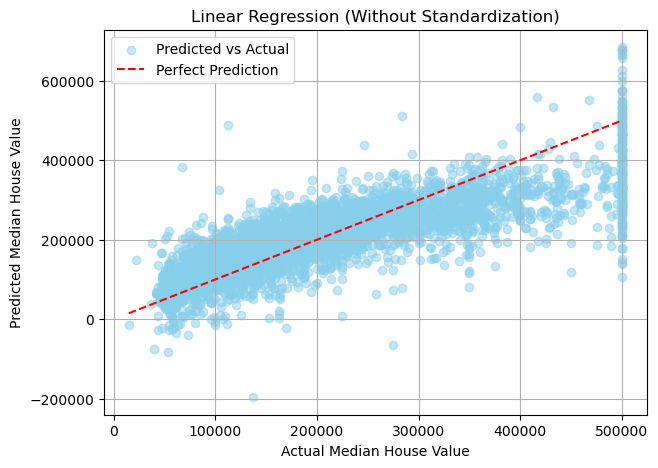

In [5]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_raw, alpha=0.5, color='skyblue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression (Without Standardization)')
plt.legend()
plt.grid(True)
plt.show()



## 1(c). Standardize the dataset features and retrain the model
We standardize all numerical features to **zero mean and unit variance** using `StandardScaler`.
Then, retrain the Linear Regression model and record the new coefficients and metrics.


In [6]:

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on standardized data
lr_std = LinearRegression()
lr_std.fit(X_train_scaled, y_train)

# Predictions
y_pred_std = lr_std.predict(X_test_scaled)

# Evaluate performance
mse_std = mean_squared_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

print("Intercept (Standardized):", lr_std.intercept_)
print("\nCoefficients (Standardized):")
for col, coef in zip(X.columns, lr_std.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nMean Squared Error (Standardized): {mse_std:.2f}")
print(f"R² Score (Standardized): {r2_std:.4f}")


Intercept (Standardized): 206644.4000978828

Coefficients (Standardized):
longitude: -85341.7259
latitude: -90434.6708
housing_median_age: 14527.4114
total_rooms: -18174.2547
total_bedrooms: 48354.3074
population: -41513.2260
households: 15739.4966
median_income: 76467.2399

Mean Squared Error (Standardized): 4921881237.63
R² Score (Standardized): 0.6401



### Plot – Predictions vs Actual (With Standardization)


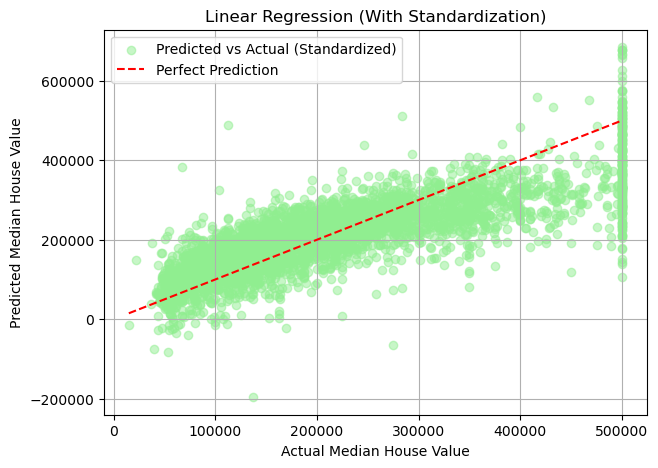

In [7]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_std, alpha=0.5, color='lightgreen', label='Predicted vs Actual (Standardized)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression (With Standardization)')
plt.legend()
plt.grid(True)
plt.show()



## 1(d). Comparison and Observations
Let's compare both models in terms of coefficients and performance metrics.


In [8]:

comparison = pd.DataFrame({
    'Feature': X.columns,
    'Coeff (Raw)': lr_raw.coef_,
    'Coeff (Standardized)': lr_std.coef_
})

print("Comparison of Coefficients:")
display(comparison)

print("\nPerformance Metrics:")
print(f"Without Standardization -> MSE: {mse_raw:.2f}, R²: {r2_raw:.4f}")
print(f"With Standardization    -> MSE: {mse_std:.2f}, R²: {r2_std:.4f}")


Comparison of Coefficients:


,Feature,Coeff (Raw),Coeff (Standardized)
0,longitude,-42546.706006,-85341.725905
1,latitude,-42336.042987,-90434.670781
2,housing_median_age,1155.097108,14527.411388
3,total_rooms,-8.440418,-18174.254702
4,total_bedrooms,115.830375,48354.307406
5,population,-36.758767,-41513.225960
6,households,41.640434,15739.496561
7,median_income,40293.278408,76467.239870



Performance Metrics:
Without Standardization -> MSE: 4921881237.63, R²: 0.6401
With Standardization    -> MSE: 4921881237.63, R²: 0.6401



### **Summary Report (5–10 lines)**

- Standardization changed the **scale of coefficients**, bringing them to comparable magnitudes across features.  
- While the **intercept and coefficients** differ numerically, the overall **R² performance** may remain similar because Linear Regression is scale-invariant for pure numerical stability.  
- Standardization ensures that features with large scales do not dominate gradient-based learning algorithms.  
- For this dataset, performance differences are usually minor, but standardized models are **numerically more stable**.  
- Standardization becomes crucial in models sensitive to feature scaling (e.g., Ridge, Lasso, or Gradient Descent-based models).  

---
